# Guitar Tuner Project


# Importing Libraries


In [2]:
##Scipy functions
import scipy.io.wavfile as wv
from scipy.fftpack import fft
from scipy.signal import find_peaks

##Others
import numpy as np
import os
import matplotlib.pyplot as plt

# Main


## Read .wav files as signals


In [3]:
DATA_FOLDER_PATH = "../Data" #Specify Data folder directory here
FILENAME = "string_1.wav" #Specify file name here


filepath = os.path.join(DATA_FOLDER_PATH, FILENAME)

In [4]:
sampleFreq, audio = wv.read(filepath) #Reading audio signal here

In [5]:
sampleLen = len(audio)/sampleFreq #Calculating length of audio signal based on frequency
print(f"Sound is {sampleLen}s long")

Sound is 5.38702947845805s long


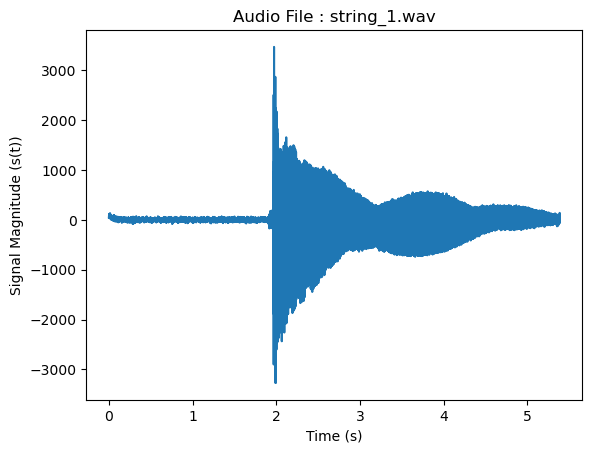

In [6]:
## Plotting the read audio signal

timeX = np.arange(0, sampleLen, 1/sampleFreq)

plt.plot(timeX, audio)
plt.xlabel("Time (s)")
plt.ylabel("Signal Magnitude (s(t))")
plt.title(f"Audio File : {FILENAME}")

plt.show()

## FFT of Signal


In [7]:
freqSpectrum = abs(fft(audio)) #Calculate the FFT of audio Signal. Using abs because of complex values.

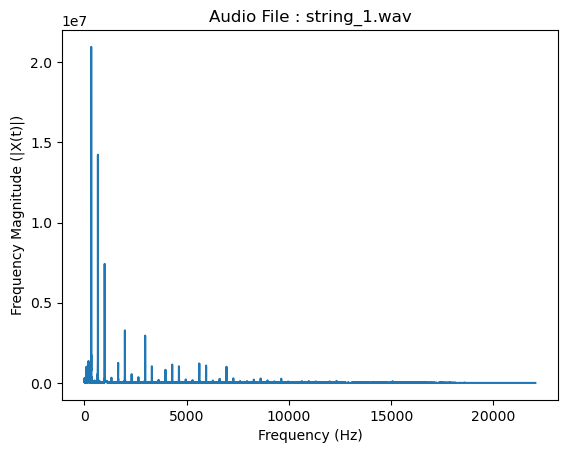

In [8]:
freqX = np.arange(0, sampleFreq/2, 1/sampleLen) #Since signal is symetric, only plotting values below half of sampleFreq

plt.plot(freqX, freqSpectrum[:len(freqX)]) #We could also cut the displayed frequency band earlier


plt.xlabel("Frequency (Hz)")
plt.ylabel("Frequency Magnitude (|X(t)|)")
plt.title(f"Audio File : {FILENAME}")

plt.show()

## Find fundamental Frequency


Fundamental Frequency is the frequency associated with the first peak of the spectrum. We first need to identify major peaks within the spectrum. To do this, we'll use the find_peaks function from the scipy library, limiting our search to peaks with an height at least quarter of the max peak height.


In [9]:
peaks , _ = find_peaks(freqSpectrum[:len(freqX)], height=max(freqSpectrum[:len(freqX)])/4, distance=250)

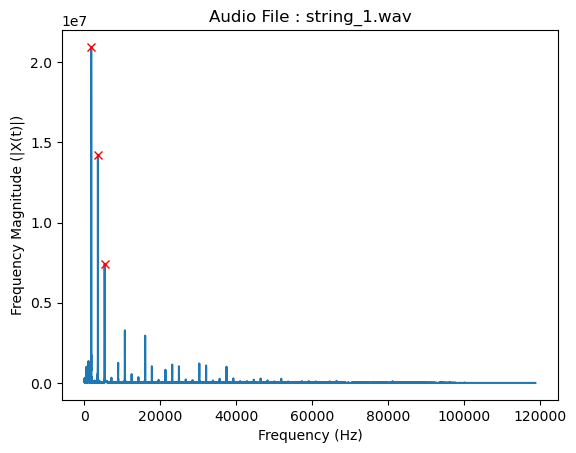

In [10]:
##Plotting the calculated peaks on the frequency plot

plt.plot(freqSpectrum[:len(freqX)])
plt.plot(peaks, freqSpectrum[peaks], 'x', color='red')

plt.xlabel("Frequency (Hz)")
plt.ylabel("Frequency Magnitude (|X(t)|)")
plt.title(f"Audio File : {FILENAME}")

plt.show()

In [11]:
fundamentalFrequency = peaks[0] / sampleLen
print(f"Detected Frequency : {fundamentalFrequency:.2f} Hz") #Calculating frequency of the note played

Detected Frequency : 329.68 Hz


## Find closest Note


In [12]:
##Dictionnary of all notes with associated frequencies

NOTE_DICT = {'E1':329.63,
             'B2':246.94,
             'G3':196,
             'D4':146.83,
             'A5':110,
             'E6':82.41}

In [13]:
detectedNote, theoreticalFrequency = min(NOTE_DICT.items(), key=lambda dictItem: abs(dictItem[1]-fundamentalFrequency)) #We search the closest frequency among the dict items

print(f"Note played is {detectedNote} (Theoretical frequency : {theoreticalFrequency} Hz, detected frenquency {fundamentalFrequency:.2f} Hz).")

Note played is E1 (Theoretical frequency : 329.63 Hz, detected frenquency 329.68 Hz).


## Calculate accuracy in cent


In [14]:
##Dictionnary for accuracy in cent associated with each note

CENT_DICT = {'E1':0.15,
             'B2':0.15,
             'G3':0.15,
             'D4':0.08,
             'A5':0.08,
             'E6':0.04}

In [15]:
centValue = (fundamentalFrequency - theoreticalFrequency) // CENT_DICT[detectedNote] #Calculating accuracy in cent
print(f"Accuracy in cent is {centValue}.")

Accuracy in cent is 0.0.


In [16]:
print("Guitar is well-tuned." if abs(centValue) <=5 else "Please, tune your instrument !") #Guitar is well-tuned if |centValue| <= 5

Guitar is well-tuned.
